In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


path = "../Data/"
filename = "K1_1LF_n1=201_Gamma=0.200000_L_ini=500_nODE=100.h5"
PC = "ParquetCheck_"
ea = "error_analysis_"

In [2]:
def load_K1(file, nLambda=0):
    with h5py.File(file, 'r') as f:
        w = np.array(f["bfreqs"])
        K1_a = np.array(f["K1_a"][nLambda])
        K1_p = np.array(f["K1_p"][nLambda])
        K1_t = np.array(f["K1_t"][nLambda])

    nw = len(w)
    K1a = np.zeros((2, nw), dtype=complex)
    K1p = np.zeros((2, nw), dtype=complex)
    K1t = np.zeros((2, nw), dtype=complex)
    for iK in range(2):
        for iw in range(nw):
            K1a[iK][iw] = K1_a[iK * nw + iw][0] + 1j * K1_a[iK * nw + iw][1]
            K1p[iK][iw] = K1_p[iK * nw + iw][0] + 1j * K1_p[iK * nw + iw][1]
            K1t[iK][iw] = K1_t[iK * nw + iw][0] + 1j * K1_t[iK * nw + iw][1]

    return w, K1a, K1p, K1t

In [3]:
def load_SE(file, nLambda=0):
    with h5py.File(file, 'r') as f:
        v = np.array(f["ffreqs"])
        self = np.array(f["selflist"][nLambda])

    nv = len(v)
    SE = np.zeros((2, nv), dtype=complex)
    for iK in range(2):
        for iv in range(nv):
            SE[iK][iv] = self[iK * nv + iv][0] + 1j * self[iK * nv + iv][1]

    return v, SE

In [4]:
w_fRG, K1a_fRG, K1p_fRG, K1t_fRG = load_K1(path+filename)
w_PC , K1a_PC , K1p_PC , K1t_PC  = load_K1(path+PC+filename)

v_fRG, SE_fRG = load_SE(path+filename)
v_PC , SE_PC  = load_SE(path+PC+filename)

In [5]:
with h5py.File(path+ea+filename, 'r') as f:
    lambdas = np.array(f['lambdas'])
    K1_diff_abs = np.array(f['K1_diff_abs'])
    K1_diff_rel = np.array(f['K1_diff_rel'])
    Sigma_diff_abs = np.array(f['Sigma_diff_abs'])
    Sigma_diff_rel = np.array(f['Sigma_diff_rel'])

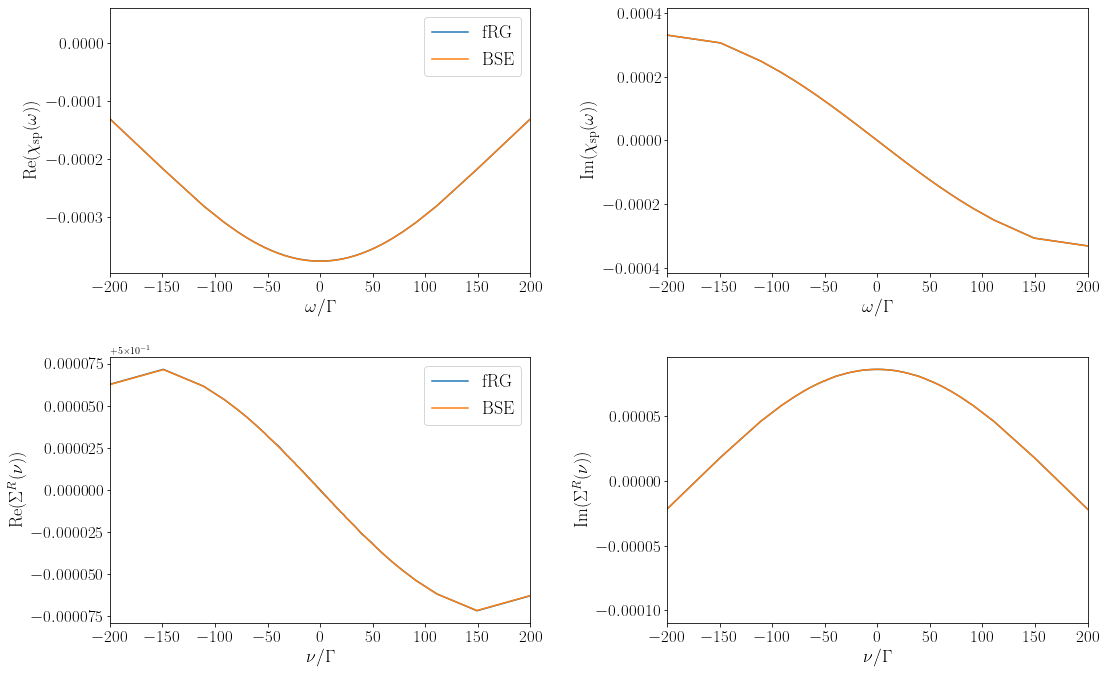

In [6]:

fs = 18
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

# real part of spin susceptibility (retarded comp. of K1a)
ax[0][0].plot(w_fRG, K1a_fRG[0].real, label='fRG')
ax[0][0].plot(w_PC , K1a_PC[0].real, label='BSE')

# imag part of spin susceptibility (retarded comp. of K1a = -advanced comp. of K1a)
ax[0][1].plot(w_fRG, -K1a_fRG[0].imag, label='fRG')
ax[0][1].plot(w_PC, -K1a_PC[0].imag, label='BSE')

#real part of the self energy
ax[1][0].plot(v_fRG, SE_fRG[0].real, label='fRG')
ax[1][0].plot(v_PC , SE_PC[0].real, label='BSE')
#imag part of the self energy
ax[1][1].plot(v_fRG, SE_fRG[0].imag, label='fRG')
ax[1][1].plot(v_PC , SE_PC[0].imag, label='BSE')

ax[0][0].set_ylabel(r'$\mathrm{Re}(\chi_\mathrm{sp}(\omega))$', fontsize=fs)
ax[0][1].set_ylabel(r'$\mathrm{Im}(\chi_\mathrm{sp}(\omega))$', fontsize=fs)
ax[1][0].set_ylabel(r'$\mathrm{Re}(\Sigma^R(\nu))$', fontsize=fs)
ax[1][1].set_ylabel(r'$\mathrm{Im}(\Sigma^R(\nu))$', fontsize=fs)

for i in range(2):
    ax[0][i].set_xlim(np.array([-1,1])*200)
    ax[0][i].set_xlabel(r'$\omega/\Gamma$', fontsize=fs)
    
    ax[1][i].set_xlim(np.array([-1,1])*200)
    ax[1][i].set_xlabel(r'$\nu/\Gamma$', fontsize=fs)
    
    ax[0][i].tick_params(axis='both', labelsize=fs-1)
    ax[1][i].tick_params(axis='both', labelsize=fs-1)

    ax[i][0].legend(fontsize=fs)
    

fig.tight_layout(pad=3.0)

plt.savefig("spin_susc@Lambda="+str(lambdas[0])+".pdf")


In [9]:
def norm(vec):
    suma = 0
    for x in vec: 
            suma += abs(x)**2       
    return np.sqrt(suma)

In [10]:
norms_V_fRG = np.zeros(len(lambdas))
norms_S_fRG = np.zeros(len(lambdas))

for i in range(len(lambdas)):
    
    w_fRG, K1a_fRG, K1p_fRG, K1t_fRG = load_K1(path+filename, i)
    w_PC , K1a_PC , K1p_PC , K1t_PC  = load_K1(path+PC+filename, i)
    
    v_fRG, SE_fRG = load_SE(path+filename, i)
    v_PC , SE_PC  = load_SE(path+PC+filename, i)

    norm_K1a_fRG = norm(K1a_fRG[0]) + norm(K1a_fRG[1])
    norm_K1p_fRG = norm(K1p_fRG[0]) + norm(K1p_fRG[1])
    norm_K1t_fRG = norm(K1t_fRG[0]) + norm(K1t_fRG[1])
    norms_V_fRG[i] = norm_K1a_fRG + norm_K1p_fRG + norm_K1t_fRG
    
    norms_S_fRG[i] = norm(SE_fRG[0]-0.5) + norm(SE_fRG[1])

    

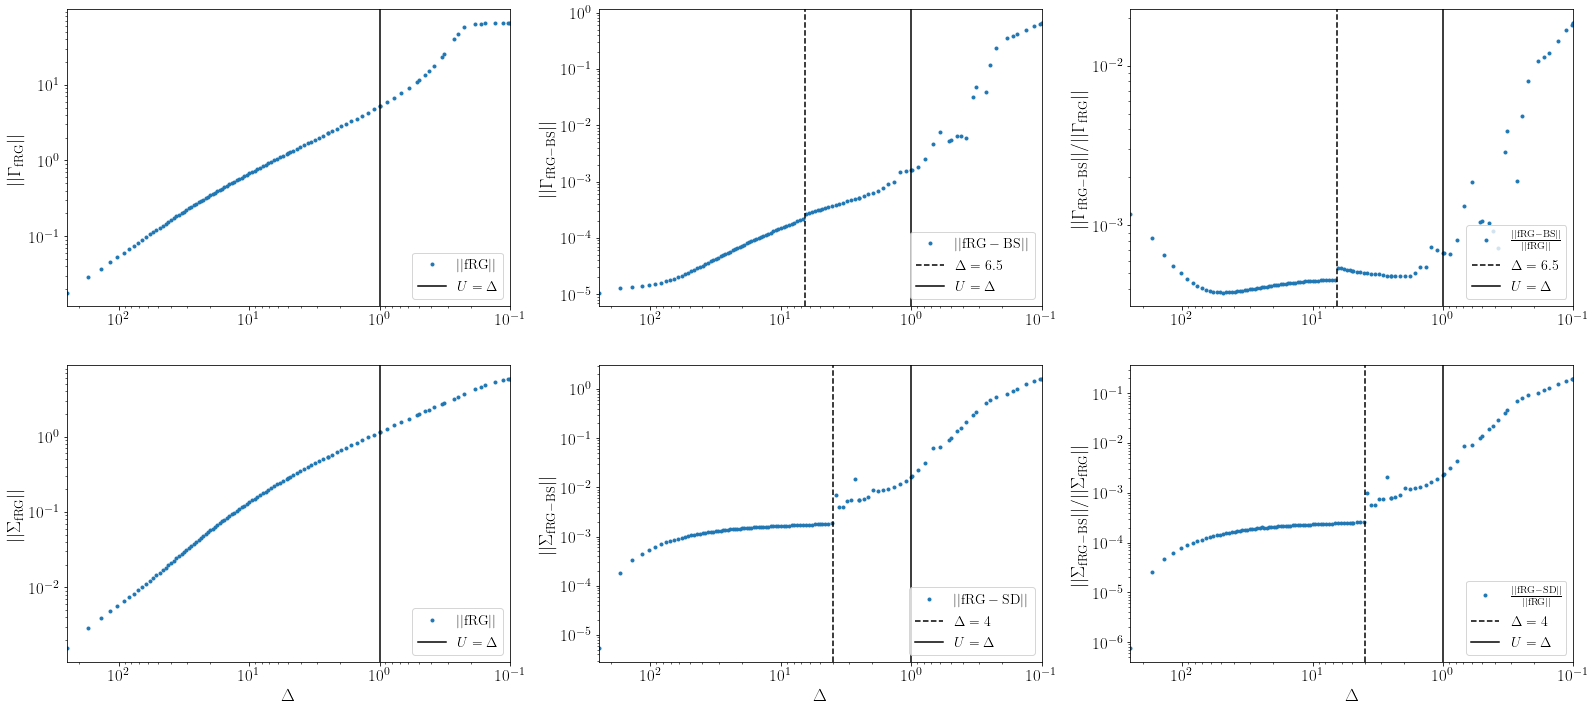

In [66]:
fs = 18
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(27,12))

Deltas = (lambdas + 0.2)/2

ax[0][0].plot(Deltas, norms_V_fRG, '.', label=r'$||\mathrm{fRG}||$')
ax[0][1].plot(Deltas, K1_diff_abs, '.', label=r'$||\mathrm{fRG-BS}||$')
ax[0][2].plot(Deltas, K1_diff_rel, '.', label=r'$\frac{||\mathrm{fRG-BS}||}{||\mathrm{fRG}||}$')

ax[1][0].plot(Deltas, norms_S_fRG, '.', label=r'$||\mathrm{fRG}||$')
ax[1][1].plot(Deltas, Sigma_diff_abs, '.', label=r'$||\mathrm{fRG-SD}||$')
ax[1][2].plot(Deltas, Sigma_diff_rel, '.', label=r'$\frac{||\mathrm{fRG-SD}||}{||\mathrm{fRG}||}$')


ax[0][0].set_ylabel(r'$||\Gamma_{\mathrm{fRG}}||$',fontsize=fs)
ax[0][1].set_ylabel(r'$||\Gamma_{\mathrm{fRG}-\mathrm{BS}}||$',fontsize=fs)
ax[0][2].set_ylabel(r'$||\Gamma_{\mathrm{fRG}-\mathrm{BS}}||/||\Gamma_{\mathrm{fRG}}||$',fontsize=fs)
ax[1][0].set_ylabel(r'$||\Sigma_{\mathrm{fRG}}||$',fontsize=fs)
ax[1][1].set_ylabel(r'$||\Sigma_{\mathrm{fRG}-\mathrm{BS}}||$',fontsize=fs)
ax[1][2].set_ylabel(r'$||\Sigma_{\mathrm{fRG}-\mathrm{BS}}||/||\Sigma_{\mathrm{fRG}}||$',fontsize=fs)

ax[0][1].axvline(6.5, ls='--', color='k', label=r'$\Delta=6.5$')
ax[0][2].axvline(6.5, ls='--', color='k', label=r'$\Delta=6.5$')
ax[1][1].axvline(4, ls='--', color='k', label=r'$\Delta=4$')
ax[1][2].axvline(4, ls='--', color='k', label=r'$\Delta=4$')

for i in range(2):
    for j in range(3):
        ax[i][j].axvline(1, color='k', label=r'$U=\Delta$')
        ax[i][j].set_xlim(Deltas[0], Deltas[-1])
        ax[i][j].set_xscale("log")
        ax[1][j].set_xlabel(r'$\Delta$', fontsize = fs)
        ax[i][j].set_yscale("log")
        ax[i][j].legend(loc='lower right', fontsize=fs-4)
        ax[i][j].tick_params(axis='both', labelsize=fs-1)



plt.savefig("error_analysis_in_Delta.pdf")